Load the folder text files of the classic novels

Charles Dickens is one of the most popular author in the 19th century in England. Some of the his famous novels are presented and compared here. I will be using wordcloud, Tf-Idf to measure the vocabulary weights from his novels. My conclusion was his most vocabulary counts is similar to the classical novel and Jane Austen's novels which I compared in my other files.

In [1]:
# Import library
import glob
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
# ... YOUR CODE FOR TASK 1 ...
files.sort()
files

['datasets\\AChristmasCarol.txt',
 'datasets\\ATaleOfTwoCities.txt',
 'datasets\\BleakHouse.txt',
 'datasets\\DavidCopperfield.txt',
 'datasets\\GreatExpectations.txt',
 'datasets\\HardTimes.txt',
 'datasets\\LittleDorrit.txt',
 'datasets\\OliverTwist.txt',
 'datasets\\OurMutualFriend.txt',
 'datasets\\ThePickWickPapers.txt']

The list of novels is shown above.

In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []


for n in files:
    # Open each file
    f = open(n, encoding = 'utf-8-sig')
    # Remove all non-alpha-numeric characters
    # ... YOUR CODE FOR TASK 2 ...

    data = re.sub('[\W_]+',' ', f.read())
    # Store the texts and titles of the books in two separate lists
    # ... YOUR CODE FOR TASK 2 ...
    # ... YOUR CODE FOR TASK 2 ...
    titles.append(os.path.basename(n).replace('.txt', ''))
    txts.append(data)
    
[len(t) for t in txts]

[173956,
 741719,
 1876862,
 1862102,
 969424,
 565267,
 1821233,
 867782,
 1743873,
 1672612]

Above is the word length of each novel.


In [4]:
# Getting the English stop words from nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Printing out the first eight stop words
# ... YOUR CODE FOR TASK 6 ...
print(sw)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alloq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',

In [5]:
# Convert the text to lower case 
txts_lower_case = [word.lower() for word in txts]

# Transform the text into tokens 
txts_split = [word_lower.split() for word_lower in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in sw]for txt in txts_split]
texts[4][:20]

['project',
 'gutenberg',
 'ebook',
 'great',
 'expectations',
 'charles',
 'dickens',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use']

In [6]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
bows = [dictionary.doc2bow(text) for text in texts]
bows[4][:5]

[(0, 1), (1, 47), (4, 1), (5, 1), (8, 6)]

In [7]:
from gensim.models import TfidfModel
from gensim import similarities
import pandas as pd

#Find the Tfidf(term frequency-inverse document frequency) of the dictionary words. The model defines the importance of each word.
model = model = TfidfModel(bows)
# Compute the similarity matrix (pairwise distance between all texts).
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))
# Add the titles of the books as columns and index of the dataframe
# ... YOUR CODE FOR TASK 10 ...
sim_df.columns = titles
sim_df.index = titles
# Print the resulting matrix
# ... YOUR CODE FOR TASK 10 ...
sim_df

,AChristmasCarol,ATaleOfTwoCities,BleakHouse,DavidCopperfield,GreatExpectations,HardTimes,LittleDorrit,OliverTwist,OurMutualFriend,ThePickWickPapers
AChristmasCarol,1.000000,0.000481,0.000504,0.000530,0.000324,0.000214,0.000377,0.000272,0.000425,0.000718
ATaleOfTwoCities,0.000481,1.000001,0.001635,0.001112,0.001371,0.000869,0.004770,0.000928,0.001079,0.001328
BleakHouse,0.000504,0.001635,0.999999,0.002868,0.003412,0.002419,0.001809,0.002745,0.004703,0.002008
DavidCopperfield,0.000530,0.001112,0.002868,1.000001,0.001658,0.001505,0.001607,0.001835,0.002130,0.001557
GreatExpectations,0.000324,0.001371,0.003412,0.001658,1.000001,0.001039,0.001732,0.000987,0.001731,0.000985
HardTimes,0.000214,0.000869,0.002419,0.001505,0.001039,1.000003,0.000713,0.000630,0.001178,0.001342
LittleDorrit,0.000377,0.004770,0.001809,0.001607,0.001732,0.000713,1.000000,0.000791,0.001393,0.000989
OliverTwist,0.000272,0.000928,0.002745,0.001835,0.000987,0.000630,0.000791,1.000001,0.001811,0.001187
OurMutualFriend,0.000425,0.001079,0.004703,0.002130,0.001731,0.001178,0.001393,0.001811,0.999999,0.002137
ThePickWickPapers,0.000718,0.001328,0.002008,0.001557,0.000985,0.001342,0.000989,0.001187,0.002137,1.000000


No much correlation between each novel.

In [8]:
# Convert the tf-idf model into a DataFrame
for i, title in enumerate(titles):
    df_tfidf = pd.DataFrame(model[bows][i], columns = ['id', 'score'])

# Name the columns of the DataFrame id and score
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf
# Add the tokens corresponding to the numerical indices for better readability
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])
    df_tfidf['title'] = title
# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf = df_tfidf.sort_values('score', ascending = False)
    
    print(df_tfidf)

        id     score       token            title
1650  3553  0.982129     scrooge  AChristmasCarol
1167  2522  0.096903      marley  AChristmasCarol
433    938  0.096903    cratchit  AChristmasCarol
1930  4173  0.070713         tim  AChristmasCarol
690   1547  0.049761    fezziwig  AChristmasCarol
434    939  0.036666   cratchits  AChristmasCarol
756   1679  0.023571        fred  AChristmasCarol
192    440  0.021502         bob  AChristmasCarol
1256  2717  0.019755      nephew  AChristmasCarol
276    602  0.019172       carol  AChristmasCarol
1045  2234  0.016675       jacob  AChristmasCarol
1941  4193  0.015714      topper  AChristmasCarol
44     135  0.015714         ali  AChristmasCarol
526   1123  0.013095      dilber  AChristmasCarol
605   1306  0.012814    ebenezer  AChristmasCarol
531   1129  0.010984        ding  AChristmasCarol
105    283  0.010984        baba  AChristmasCarol
1888  4082  0.010984        tank  AChristmasCarol
568   1210  0.010984        dong  AChristmasCarol


[11596 rows x 4 columns]
         id     score         token              title
7797  22493  0.418594           pip  GreatExpectations
7408  22104  0.390361      havisham  GreatExpectations
7421  22117  0.384223       herbert  GreatExpectations
8335  23031  0.348624       wemmick  GreatExpectations
7217  21913  0.331438       estella  GreatExpectations
7535  22231  0.297067       jaggers  GreatExpectations
6849  21545  0.283564         biddy  GreatExpectations
7859  22555  0.200091   pumblechook  GreatExpectations
8364  23060  0.146078        wopsle  GreatExpectations
7166  21862  0.108024       drummle  GreatExpectations
7854  22550  0.085928        provis  GreatExpectations
7735  22431  0.072425        orlick  GreatExpectations
7014  21710  0.071198     compeyson  GreatExpectations
8210  22906  0.057695         trabb  GreatExpectations
7336  22032  0.047874       gargery  GreatExpectations
4996  13895  0.044617        handel  GreatExpectations
8022  22718  0.040509      skiffins  Gre

          id     score         token            title
10765  27685  0.655987        boffin  OurMutualFriend
12484  29404  0.331380          wegg  OurMutualFriend
11209  28129  0.241762      fledgeby  OurMutualFriend
11149  28069  0.231862        eugene  OurMutualFriend
10077  24457  0.222856         bella  OurMutualFriend
11520  28440  0.211541        lammle  OurMutualFriend
12002  28922  0.174027     riderhood  OurMutualFriend
11557  28477  0.149017     lightwood  OurMutualFriend
11567  28487  0.147975        lizzie  OurMutualFriend
12008  28928  0.140159     rokesmith  OurMutualFriend
12346  29266  0.130781       twemlow  OurMutualFriend
12499  29419  0.129217        wilfer  OurMutualFriend
12437  29357  0.128696     veneering  OurMutualFriend
11854  28774  0.127133       podsnap  OurMutualFriend
10780  27700  0.121923       bradley  OurMutualFriend
11357  28277  0.090140     headstone  OurMutualFriend
8305   17709  0.081485         venus  OurMutualFriend
12515  29435  0.074508      

Text(0.5,1,'Similarity Value for Pride And Prejudice')

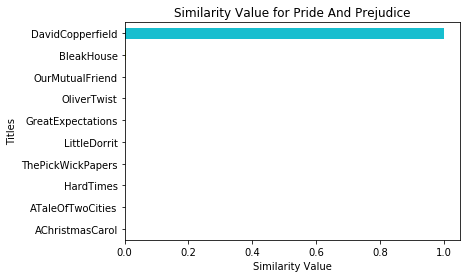

In [9]:
# This is needed to display plots in a notebook
%matplotlib inline

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['DavidCopperfield'] 

# Sort by ascending scores
v_sorted = v.sort_values(ascending = True)

# Plot this data has a horizontal bar plot
# ... YOUR CODE FOR TASK 11 ...
v_sorted.plot.barh(x = 'lab', y = 'val', rot = 0).plot
# Modify the axes labels and plot title for a better readability
# ... YOUR CODE FOR TASK 11 ...
plt.xlabel('Similarity Value')
plt.ylabel('Titles')
plt.title('Similarity Value for Pride And Prejudice')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [40.0, 40.0, 76.25, 76.25],
  [25.0, 25.0, 58.125, 58.125],
  [10.0, 10.0, 41.5625, 41.5625]],
 'dcoord': [[0.0, 1.4074687775218282, 1.4074687775218282, 0.0],
  [0.0, 1.4123177586181692, 1.4123177586181692, 0.0],
  [0.0, 1.4075641430006178, 1.4075641430006178, 0.0],
  [0.0, 1.4115860809692644, 1.4115860809692644, 1.4075641430006178],
  [0.0, 1.411620819679292, 1.411620819679292, 0.0],
  [1.4115860809692644,
   1.4125860209872172,
   1.4125860209872172,
   1.411620819679292],
  [1.4123177586181692,
   1.4135150155640281,
   1.4135150155640281,
   1.4125860209872172],
  [0.0, 1.4151784169785406, 1.4151784169785406, 1.4135150155640281],
  [1.4074687775218282,
   1.417489989645673,
   1.417489989645673,
   1.4151784169785406]],
 'ivl': ['ATaleOfTwoCities',
  'LittleDorrit',
  'AChristmasCarol',
  'HardTimes',
  'Th

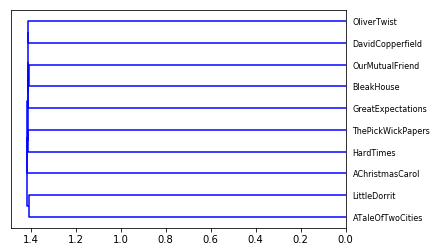

In [10]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
# ... YOUR CODE FOR TASK 12 ...
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation="left")

Pretty much every single novel is unique on its own. If I removed all the character names in the novel, maybe that would produce a better comparison. 

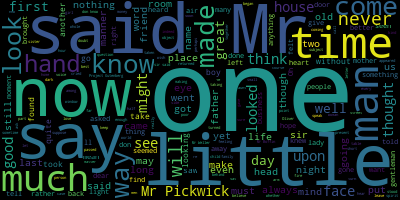

In [11]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
long_string = ' '.join(txts)

wordcloud.generate(long_string)
wordcloud.to_image()

Comparing with Jane Austen and the Classical novels, Dickens also use the words 'one', 'now', much' alot. He used 'little' and 'Mr' which no other word clouds used quit often.